In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [39]:
data = pd.read_csv('data.csv')

In [40]:
data.head()

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [41]:
train = data[:90]

In [42]:
train.shape

(90, 2)

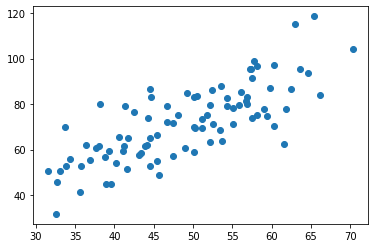

In [43]:
plt.scatter(x = 'X', y = 'Y', data=train)

In [44]:
m = train.X.values.size
x = np.append(np.ones((m,1)), train.X.values.reshape(m, 1), axis = 1)
y = train.Y.values.reshape(m, 1)

In [45]:
print("X: ", x.shape, "Y: ", y.shape)

X:  (90, 2) Y:  (90, 1)


In [46]:
theta = np.ones((2,1))
theta

array([[1.],
       [1.]])

In [47]:
def cost(x, y, theta):
    y_pred = np.dot(x, theta)
    error = (y_pred - y)**2
    cost_val = (1/(2*m)) * (np.sum(error))
    return cost_val

In [48]:
cost(x, y, theta)

297.27960664292306

In [49]:
def grad_des(x, y, theta, eta, epoch):
    costs = []
    for i in range(epoch):
        y_pred = np.dot(x, theta)
        error = y_pred - y
        all_but_theta =(eta/m) * (np.sum(np.dot((np.transpose(x)), error)))
        theta -= all_but_theta
        costs.append(cost(x,y,theta))
    return costs, theta

In [50]:
costs, theta = grad_des(x, y, theta, 0.0001, 1000)

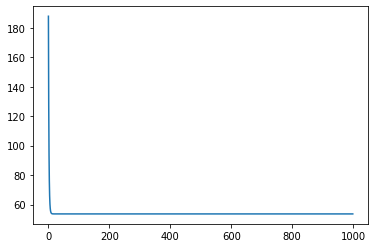

In [51]:
plt.plot(costs)

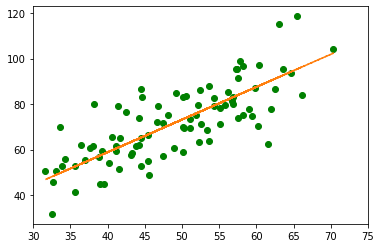

In [52]:
plt.scatter(x = 'X', y = 'Y', data=train, color = 'green')
x_vals = x
y_vals = np.dot(x_vals, theta)
plt.xlim((30, 75))
plt.plot(x_vals, y_vals, '--')

In [53]:
print("Enter X value:")
var = int(input())

Enter X value:
100


In [54]:
ans = theta[0, 0] + theta[1,0]*var

In [55]:
print("The predcited Y value is: ", ans)

The predcited Y value is:  144.90150029921622


In [56]:
costs

[187.81810328972864,
 127.53627738616733,
 94.33831807674734,
 76.0557845636941,
 65.98736353393905,
 60.442557505822954,
 57.38896312408489,
 55.707310312264134,
 54.781202969253165,
 54.271184013645914,
 53.99031016350126,
 53.83562940344765,
 53.75044476444177,
 53.703532512911295,
 53.67769734627395,
 53.66346959524082,
 53.65563419389416,
 53.65131913987615,
 53.64894278538521,
 53.64763409709461,
 53.646913386001884,
 53.64651648134327,
 53.646297900958395,
 53.64617752599275,
 53.64611123398596,
 53.646074726144484,
 53.646054620817246,
 53.64604354856084,
 53.64603745093003,
 53.64603409288809,
 53.646032243572186,
 53.64603122513066,
 53.64603066426211,
 53.64603035538474,
 53.64603018528209,
 53.64603009160443,
 53.64603004001497,
 53.64603001160402,
 53.64602999595774,
 53.64602998734113,
 53.646029982595856,
 53.646029979982586,
 53.64602997854342,
 53.64602997775084,
 53.64602997731437,
 53.64602997707399,
 53.64602997694163,
 53.646029976868725,
 53.64602997682856,
 53.64